<center>
<h1> <b>Animation of the Second-Order Transfer Function</b></h1>

Dr. Bingsen Wang

6/27/2022
</center>


#Introduction

The transfer function $F(s)$ is the ratio between the output $Y(s)$ and the input $X(s)$ in Laplace domain or s-domain, i.e.
$$F(s) = {Y(s)\over X(s)}$$

There are two physical significances or interpretations about the transfer function. 
- If the input is an impulse, or $X(s)=1$, the inverse Laplace transform of the transfer function is the output signal in time domain.
- If the input is a sinusoidal function, then output singal can be obtained by scaling the input amplitude and adding a phase shift given by $|F(j\omega)|$ and $\angle F(j\omega)$, respectively.

The animation is based on the second interpretation of a second-order transfer function
$$F(s) = {K\omega_0^2 \over s^2 + 2\zeta\omega_0s+\omega_0^2}$$
where $\zeta$ is the damping ratio, which is related to the other commonly known parameter, qualify factor $Q$, by $Q={1\over2\zeta}$.

Below is the Python script.

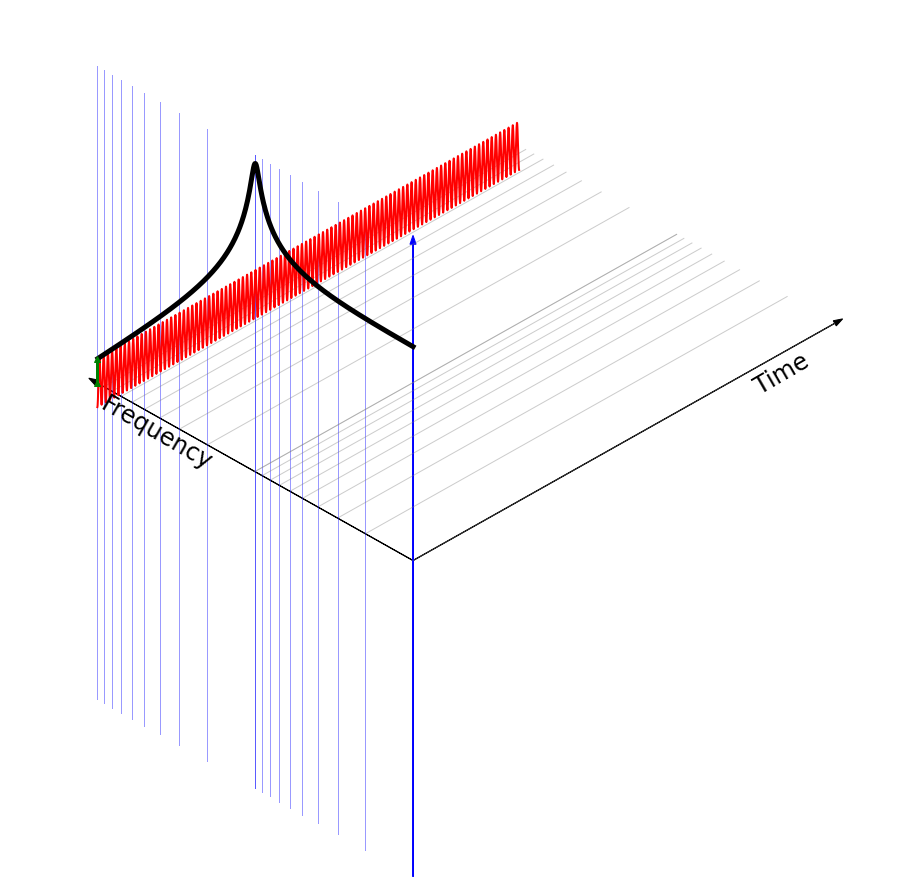

In [ ]:
from numpy.core.function_base import logspace
import numpy as np
from numpy import linspace,cos,arctan,pi,sqrt,exp,log10
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib import rc
rc('animation', html='jshtml')

def F(s,K,w0,zeta):
  return K*w0**2/(s**2 + 1*zeta*w0*s + w0**2)

def F_mag(w,K,w0,zeta):
  return np.abs(F(1j*w,K,w0,zeta))

def F_phi(w,K,w0,zeta):
  return np.angle(F(1j*w,K,w0,zeta))

Nf = 480
K=100
zeta = 0.1
w0 = 1000
x_ln = 3 # x-axis length
y_ln = 2.25 # y-axis length
z_ln = 4 # z-axis length
t = linspace(0,2*pi/(0.1*w0),5000)

w = logspace(-1,1,Nf)*w0
kw = linspace(0,Nf-1,Nf)
ampw = (20*log10(F_mag(w,K,w0,zeta))+5)/40*z_ln*0.3
phiw = F_phi(w,K,w0,zeta)

fig = plt.figure(figsize=(16,16))
ax = plt.axes(xlim=(-2.5, 3), ylim=(-2, 3.5))

plt.axis('off') #turn off the axis frames
axwidth = 0.002

x_vct = exp(1j*pi/6) # x-axis direction
y_vct = exp(1j*5*pi/6) # y-axis direction
z_vct = 1j # z-axis direction

y_grd = log10(linspace(1,10,10))

# plot x,y,z axes
ax.arrow(0,0,x_ln*x_vct.real,x_ln*x_vct.imag,width=axwidth,head_width=0.0375, ec='k',fc='k')
ax.arrow(0,0,y_ln*y_vct.real,y_ln*y_vct.imag,width=axwidth,head_width=0.0375, ec='k',fc='k')
ax.arrow(0,-0.5*z_ln*z_vct.imag,z_ln*z_vct.real,z_ln*z_vct.imag,width=axwidth,head_width=0.0375, ec='b',fc='b')
ax.text(y_ln*y_vct.real,y_ln*y_vct.imag-0.55,'Frequency',size=24,rotation=-30)
ax.text(x_ln*x_vct.real*.8,x_ln*x_vct.imag*.8-0.15,'Time',size=24,rotation=30)
# plot grid lines
def gridline(o,d,l,ax,c):
  ax.plot([o.real, (o+d*l).real],[o.imag, (o+d*l).imag],lw=1,color=c,alpha=0.4)
for k in range(2):
  for i in range(len(y_grd)):
    gridline((y_grd[i]+k)*y_ln*0.5*y_vct,x_vct,x_ln,ax,'grey')
    gridline((y_grd[i]+k)*y_ln*0.5*y_vct-0.5*z_ln*z_vct,z_vct,z_ln,ax,'b')

line_v, = plt.plot([],[],'-r',lw=2)
line_F, = plt.plot([],[],'-k',lw=5)
line_Fmagi, = plt.plot([],[],'-g^',lw=3)


# initialization function: plot the background of each frame
def init():
  line_v.set_data([],[])
  line_F.set_data([],[])
  line_Fmagi.set_data([],[])
  return line_v,line_F,line_Fmagi,

# animation function.  This is called sequentially
def animate(i):
  xi0 = i/Nf*y_ln*y_vct.real
  yi0 = i/Nf*y_ln*y_vct.imag
  xi = kw[0:i]/Nf*y_ln*y_vct.real
  yi = kw[0:i]/Nf*y_ln*y_vct.imag
  Fmagi = t*(0.1*w0)/(2*pi)*x_ln*x_vct +1j*ampw[i]*cos(w[i]*t + phiw[i])
  line_v.set_data(xi0 + Fmagi.real, yi0 + Fmagi.imag)
  line_Fmagi.set_data([xi0,xi0],[yi0,yi0 + ampw[i]])
  line_F.set_data(xi,yi+ampw[0:i])
  return line_v,line_F,line_Fmagi,


anim = animation.FuncAnimation(fig, animate, init_func=init, frames=Nf, interval=50, blit=True)
anim
# to save the animation, uncomment the following three lines
# fn = r"TransferFunction_2ndOrder_animation.mp4" 
# writervideo = animation.FFMpegWriter(fps=60) 
# anim.save(fn, writer=writervideo)

